### Here let's go through an example where we have a spatially inhomogenous data 

Similar to spatially adaptive splines we can preset our difference matrix for better performance

In [1]:
import sys

sys.path.append("../")
sys.path.append("../../")

import numpy as np
from matplotlib import pyplot as plt

from matrix_algorithms.difference_matrix import Difference_Matrix
from cv_tf import cross_validation
from adaptive_tf import adaptive_tf

from evaluation_metrics.loss_functions import compute_error
from kernel_methods.local_var import LocalVariance

array([[ 6.41004370e-01],
       [ 1.09528318e+00],
       [ 7.62738183e-01],
       [ 1.17969785e+00],
       [ 1.10288135e+00],
       [ 1.36448973e+00],
       [ 1.25906334e+00],
       [ 9.92160904e-01],
       [ 1.28907855e+00],
       [ 1.19454452e+00],
       [ 1.96498567e+00],
       [ 1.34574381e+00],
       [ 1.03892858e+00],
       [ 1.40852207e+00],
       [ 1.61883091e+00],
       [ 1.16321959e+00],
       [ 8.94350291e-01],
       [ 1.40335516e+00],
       [ 1.24998238e+00],
       [ 1.52443451e+00],
       [ 1.67029450e+00],
       [ 1.14753191e+00],
       [ 1.61039612e+00],
       [ 1.23662583e+00],
       [ 1.93708871e+00],
       [ 1.79388073e+00],
       [ 2.01481141e+00],
       [ 2.27081995e+00],
       [ 1.95424986e+00],
       [ 1.86283621e+00],
       [ 1.65886607e+00],
       [ 1.72191481e+00],
       [ 2.08028198e+00],
       [ 1.97083692e+00],
       [ 1.61028758e+00],
       [ 1.54855633e+00],
       [ 2.15161888e+00],
       [ 2.06830908e+00],
       [ 1.9

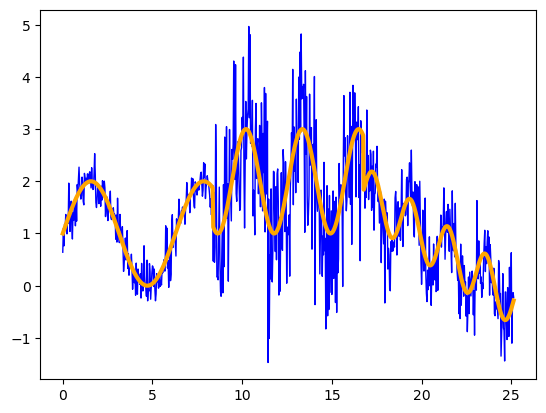

In [2]:
def generate_spatially_inhomogenous_data():

    # generate data
    n = 250

    x = np.zeros( 3 * n)

        # generate time
    t = np.linspace(0, 8*np.pi, 3 * n)
    t1=t[0:n]
    t2=t[n:2*n]
    t3=t[2*n:3*n]

    # generate spatially inhomogenous data
    x[0:n] = np.sin(t1) + np.random.normal(0, 0.25, n)+1
    x[n:2*n] = np.sin(2*t2) + np.random.normal(0, 0.95, n)+2
    x[2*n:3*n] = 0.5*np.sin(3*t3) + np.random.normal(0, 0.5, n)-0.25*t3+6

    true_fun=np.concatenate([np.sin(t1)+1,np.sin(2*t2)+2,0.5*np.sin(3*t3)-0.25*t3+6])



    return x, t, true_fun
    

x,t,true_fun=generate_spatially_inhomogenous_data()

plt.plot(t,x,color='blue',lw=1)
plt.plot(t,true_fun,color='orange',lw=3)

x=x.reshape(-1,1)
x


In [3]:
D=Difference_Matrix(len(t), 2)

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 74.73031377570491
Performing cross validation for lambda = 747.3031377570492
Performing cross validation for lambda = 7473.031377570492
No solution found for lambda = 7473.031377570492
Status: maxiter exceeded
Performing cross validation for lambda = 74730.31377570493
No solution found for lambda = 74730.31377570493
Status: maxiter exceeded
Performing cross validation for lambda = 747303.1377570492
No solution found for lambda = 747303.1377570492
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 78.97922591857291
Performing cross validation for lambda = 789.7922591857291
Performing cross validation for lambda = 7897.922591857291
No solution found for lambda = 7897.922591857291
Status: maxiter exceeded
Performing cross validation for lambda = 78979.22591857292
No solution found for lambda = 78979.22591857292
Status: maxiter 

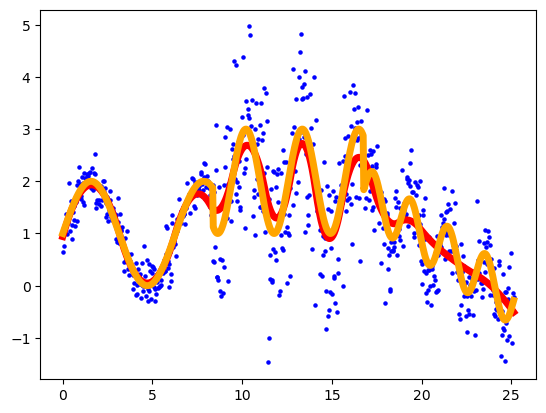

In [4]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [14]:
compute_error(true_fun,sol.flatten())

0.06248788035744419

In [15]:
prior=np.concatenate((4*np.ones(250),0.75*np.ones(250),2*np.ones(250)))

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

array([[  4., -12.,  12., ...,   0.,   0.,   0.],
       [  0.,   4., -12., ...,   0.,   0.,   0.],
       [  0.,   0.,   4., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  -2.,   0.,   0.],
       [  0.,   0.,   0., ...,   6.,  -2.,   0.],
       [  0.,   0.,   0., ...,  -6.,   6.,  -2.]])

In [16]:

best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 107.19741557969698
Performing cross validation for lambda = 1071.9741557969699
No solution found for lambda = 1071.9741557969699
Status: maxiter exceeded
Performing cross validation for lambda = 10719.741557969697
No solution found for lambda = 10719.741557969697
Status: maxiter exceeded
Performing cross validation for lambda = 107197.41557969699
No solution found for lambda = 107197.41557969699
Status: maxiter exceeded
Performing cross validation for lambda = 1071974.1557969698
No solution found for lambda = 1071974.1557969698
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 90.7031144076227
Performing cross validation for lambda = 907.031144076227
Performing cross validation for lambda = 9070.31144076227
No solution found for lambda = 9070.31144076227
Status: maxiter exceeded
Performing cross validation for lambda = 9070

In [17]:
best_lambda

87.90948489169688

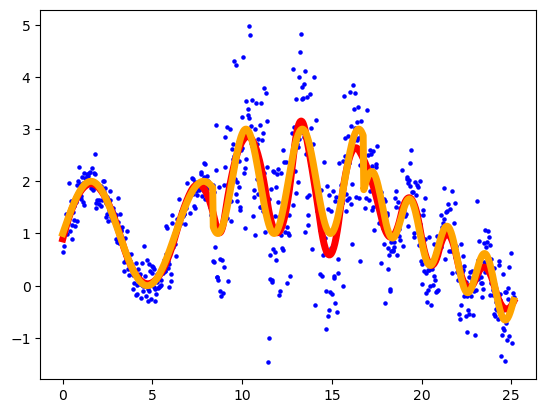

In [18]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)



In [19]:
compute_error(true_fun,sol.flatten())

0.029300742507017564

### Algorithm for Inference

Idea
- Use Kernel to Smooth out Variance
- Apply Piecewise Constant TF on this smoothed volatility

- Use estimates in prior model

In [20]:
local_var=LocalVariance(t,x,0,0.25)
local_var_series=local_var.fit()


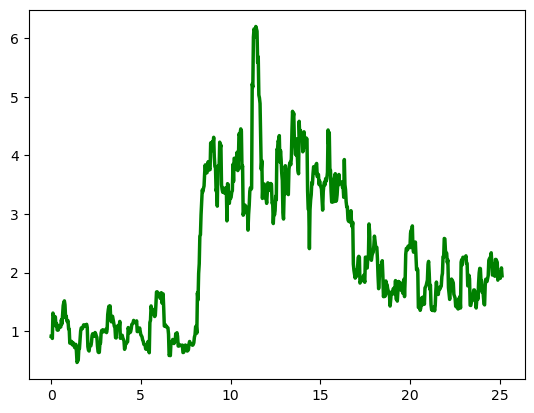

In [21]:
fig, ax = plt.subplots()
ax.plot(t, 4*local_var_series, color="green", label="Local Variance", lw=2.5)  # plots prior


In [22]:
local_var.optimal_bandwidth

0.25

### Apply Piecewise Constant TF on this smoothed volatility

In [23]:
D=Difference_Matrix(len(t), 0)

best_lambda=cross_validation(local_var_series.reshape(-1,1),D,10,5)


Performing  0 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.006639826508122391
Performing cross validation for lambda = 0.018475711679200067
Performing cross validation for lambda = 0.051409765245426106
Performing cross validation for lambda = 0.14305072564892138
Performing cross validation for lambda = 0.39804714164695826
Performing cross validation for lambda = 1.1075898165114153
Performing cross validation for lambda = 3.081934457722701
Performing cross validation for lambda = 8.575665702322413
Performing cross validation for lambda = 23.862299230182405
Performing cross validation for lambda = 66.39826508122391
Performing  1 out of 5 iterations of cross validation
Performing cross validation for lambda = 0.006879016606241194
Performing cross validation for lambda = 0.01914127233563539
Performing cross validation for lambda = 0.05326172730772935
Performing cross validation for lambda = 0.14820392009791417
Performing cross validation for lambda = 0

In [24]:
results=adaptive_tf(local_var_series.reshape(-1,1),D,25)


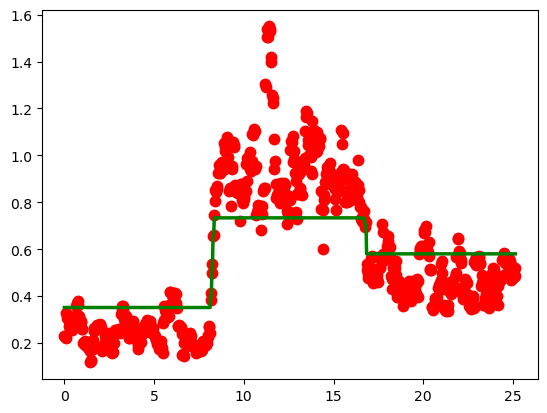

In [25]:
fig, ax = plt.subplots()
ax.plot(t, results['sol'].x, color="green", label="Local Variance", lw=2.5)  # plots prior
ax.scatter(t, local_var_series, color="red", label="Data", lw=2.5)  # plots prior

In [26]:
def extract_sol(x:np.ndarray):
    x=np.round(x,1)

    x=np.unique(x)




    return x

extract_sol(results['sol'].x)

array([0.4, 0.5, 0.6, 0.7])

In [31]:
prior=np.concatenate((1.4*np.ones(250),0.8*np.ones(250),np.ones(250)))

D=Difference_Matrix(len(t), 2,prior=prior)

D.D

array([[ 1.4, -4.2,  4.2, ...,  0. ,  0. ,  0. ],
       [ 0. ,  1.4, -4.2, ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1.4, ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ..., -1. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  3. , -1. ,  0. ],
       [ 0. ,  0. ,  0. , ..., -3. ,  3. , -1. ]])

In [32]:
best_lambda=cross_validation(x,D,5,3)

Performing  0 out of 3 iterations of cross validation
Performing cross validation for lambda = 113.112816774765
Performing cross validation for lambda = 1131.1281677476497
Performing cross validation for lambda = 11311.281677476498
No solution found for lambda = 11311.281677476498
Status: negative duality gap
Performing cross validation for lambda = 113112.81677476499
No solution found for lambda = 113112.81677476499
Status: maxiter exceeded
Performing cross validation for lambda = 1131128.1677476498
No solution found for lambda = 1131128.1677476498
Status: maxiter exceeded
Performing  1 out of 3 iterations of cross validation
Performing cross validation for lambda = 100.17667661098237
Performing cross validation for lambda = 1001.7667661098237
Performing cross validation for lambda = 10017.667661098238
No solution found for lambda = 10017.667661098238
Status: negative duality gap
Performing cross validation for lambda = 100176.67661098238
No solution found for lambda = 100176.67661098

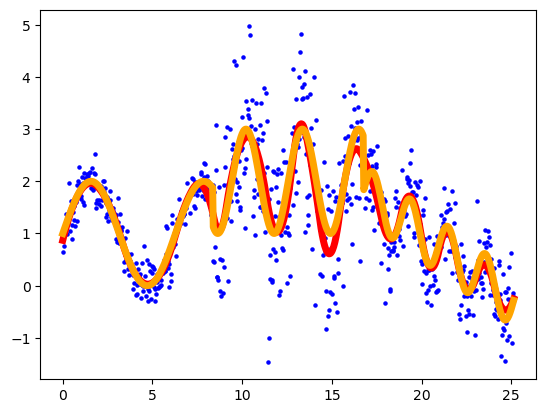

In [33]:
results=adaptive_tf(x,D,best_lambda)

sol=results['sol'].x.reshape(-1,1)

plt.plot(t,sol,label='solution',color='red',lw=5)
plt.scatter(t,x,label='data',color='blue',s=5)
plt.plot(t,true_fun,label='true function',color='orange',lw=5)


In [34]:
compute_error(true_fun,sol.flatten())

0.027475923232696455